# supervisado 

## regresion logistica
* Utilizar muchas variables
* regularizacion


In [ ]:
! pip install numpy==1.23 pandas==0.25.3 plotly scipy statsmodels==0.13.2

In [11]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tarfile
import zipfile
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [12]:
global static_img
static_img=True
def display_static(fig):
    if static_img:
        return Image(fig.to_image(format="png"))
    else:
        return fig

In [13]:
df = pd.read_csv("data/CARS.csv")
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [14]:
df.describe(include="all")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C320 4dr,Sedan,Asia,Front,"$34,495",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


In [15]:
df["EnvFriendly"] = df[["MPG_City","MPG_Highway"]]\
    .apply(lambda x: 1 if x["MPG_City"]>=21 and x["MPG_Highway"]>=23 else 0, axis=1)

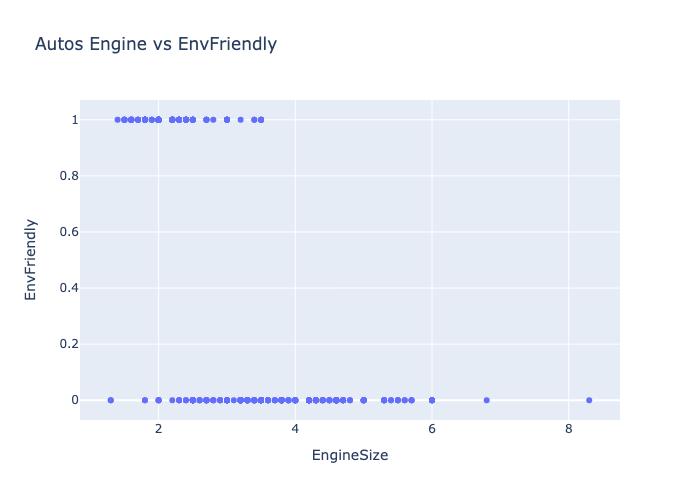

In [16]:
fig = px.scatter(df[["EngineSize","EnvFriendly"]], x="EngineSize", y="EnvFriendly", 
                 title="Autos Engine vs EnvFriendly"
                )
display_static(fig)

In [20]:
df_x = pd.get_dummies(df[['Type','Origin','DriveTrain']],
                      prefix=['Type','Origin','DriveTrain'],
                      dummy_na=True, drop_first=True)
df_x = pd.concat((df_x, df), axis=1)
cols = [c for c in df_x.columns if c.startswith("Type_") or c.startswith("Origin_") or c.startswith("DriveTrain_")]
cols = cols + ["Invoice","EngineSize","Cylinders","Horsepower","Weight","Wheelbase","Length","EnvFriendly"]
df_x = df_x[cols].fillna(0)
y = df_x['EnvFriendly']
cols.remove("EnvFriendly")
X = df_x[cols]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [54]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.Logit(y_train, X_train).fit(method='bfgs',maxiter=1000)
model.summary()

         Current function value: 0.188713
         Iterations: 172
         Function evaluations: 199
         Gradient evaluations: 177


/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            EnvFriendly   No. Observations:                  342
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                           16
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.7088
Time:                        20:08:01   Log-Likelihood:                -64.540
converged:                      False   LL-Null:                       -221.61
Covariance Type:            nonrobust   LLR p-value:                 2.981e-57
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               51.9229        nan        nan        nan         nan         nan
Type_SUV           -21.6339        nan        nan        nan         nan         nan
Type_Sedan         -20.6070        nan        nan        nan         nan         nan
Type_Sports        -22.8931        nan        nan        nan         nan         nan
Type_Truck         -19.4810        nan        nan        nan         nan         nan
Type_Wagon         -20.2755        nan        nan        nan         nan         nan
Type_nan                  0        nan        nan        nan         nan         nan
Origin_Europe        0.1146        nan        nan        nan         nan         nan
Origin_USA          -0.2356        nan        nan        nan         nan         nan
Origin_nan                0        nan        nan        nan         nan         nan
DriveTrain_Front     0.9568        nan        nan        nan         nan         nan
DriveTrain_Rear     -1.1810        nan        nan        nan         nan         nan
DriveTrain_nan            0        nan        nan        nan         nan         nan
Invoice          -1.097e-05        nan        nan        nan         nan         nan
EngineSize          -0.2338        nan        nan        nan         nan         nan
Cylinders           -0.6741        nan        nan        nan         nan         nan
Horsepower          -0.0102        nan        nan        nan         nan         nan
Weight              -0.0043        nan        nan        nan         nan         nan
Wheelbase           -0.1846        nan        nan        nan         nan         nan
Length               0.0457        nan        nan        nan         nan         nan
====================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [61]:
y_hat = [ 1 if i>0.5 else 0 for i in model.predict(X_train)]
#accuracy by hand
sum([1 if h==t else 0 for h,t in zip(y_hat,y_train)])/len(y_hat)

0.9005847953216374

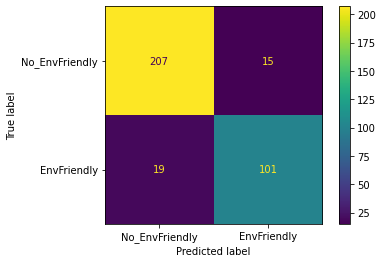

In [62]:
cm = confusion_matrix(y_train, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No_EnvFriendly","EnvFriendly"])
disp.plot()

In [63]:
y_hat = [ 1 if i>0.5 else 0 for i in model.predict(X_test)]
#accuracy by hand
sum([1 if h==t else 0 for h,t in zip(y_hat,y_test)])/len(y_hat)

0.8953488372093024

## Using sklearn

/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



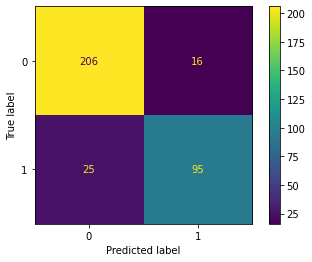

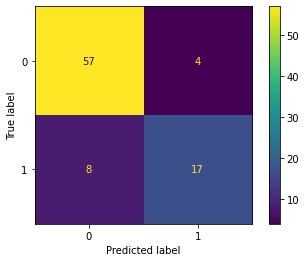

In [64]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
clf.coef_
y_hat = clf.predict(X_train)
cm = confusion_matrix(y_train, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()


In [65]:
x = X_train["EngineSize"].values
y = X_train["Weight"].values
x2, y2 = np.mgrid[0:8, 10:50]
z_cat = np.apply_along_axis(lambda x:clf.predict(X_train),0,np.stack((x,y)))[0]

In [66]:
layout = go.Layout(
        title='Funcion de Regresion logistica',
        autosize=False,
        width=1000,
        height=1000,
        showlegend = True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
     xaxis_title="EngineSize",
     yaxis_title="Weight"
)

fig = go.Figure()
fig.add_trace(
    go.Surface(z=z_cat, x=x, y=y, name='Funcion F(x)')
)
fig.add_trace(
    go.Scatter3d(
        x=x,
        y=y,
        z=y_train,
        mode ='markers',
        marker=dict(
        size=10,
        color=y_train
    ),
    name='Data')
)
fig.update_layout(
    layout
)
fig['data'][0]['showlegend']=True
fig['data'][1]['showlegend']=True
fig.show()